<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/Regrssion_MultipleLinearRegression_Analysis_on_bodyfat_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multiple Linear Regression

y = b0x1 + b1x2 + b2x3+ c



In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/Bodyfat.csv')
df

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [3]:
df.describe()

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


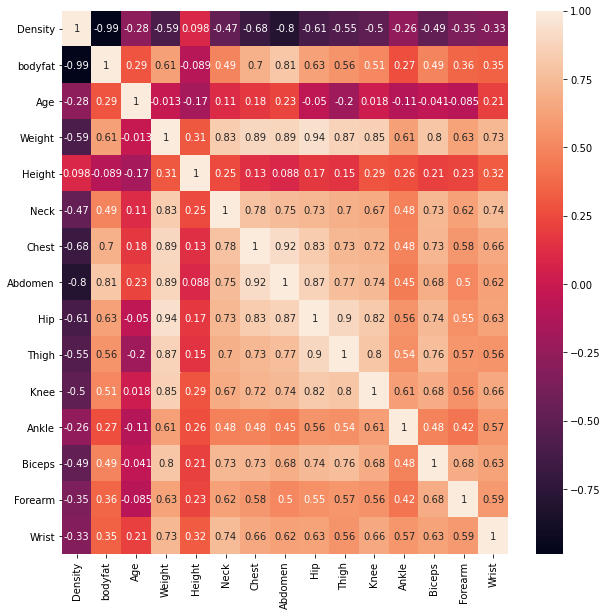

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

Conclusion :

    1=>Positive
    0=> no correlation
    -1=> negative correlation

In [5]:
df.columns

Index(['Density', 'bodyfat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

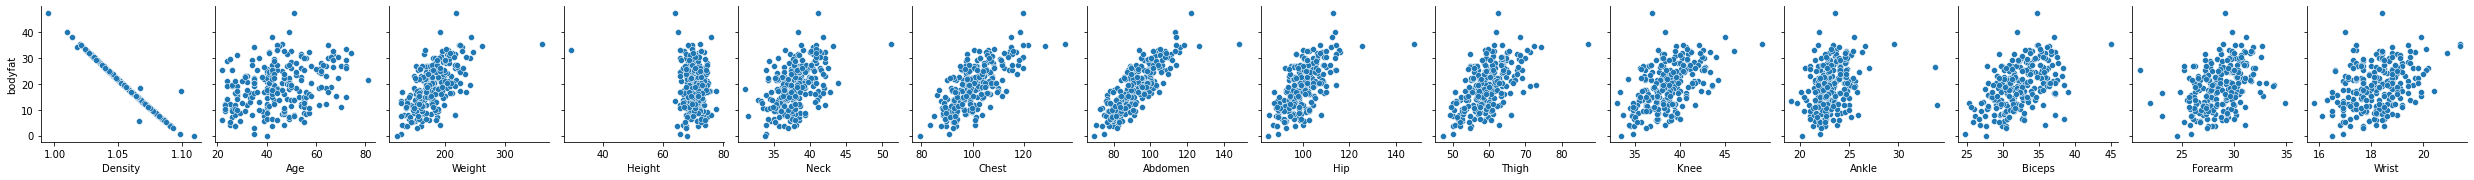

In [6]:
sns.pairplot(data=df,x_vars=['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],y_vars=['bodyfat'])

Conclusion :

    Almost all the feature variables show linear relation with the target variable.

In [7]:
#we have to divide the dataset into two parts that is.....dependant variable and independant variable
x=df.drop(columns=['bodyfat'])           #independent variable
y=df.loc[:,['bodyfat']]                  #dependent variable


#now using sklearn train and test the data by dividing the data again in train and test data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [8]:
# Fit model 

model=LinearRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [9]:
#y intercept
print(model.intercept_)
#slope
print(model.coef_)
# r square
print("Training accuracy : ",model.score(xtrain,ytrain))
print("Testing accuracy : ",model.score(xtest,ytest))

[442.41793124]
[[-4.07528220e+02  1.51277563e-02  6.60829962e-03  3.75195823e-03
  -4.09852359e-02  6.18427310e-02  1.40433415e-02  7.69278714e-03
   1.04712101e-02  7.40817259e-03 -8.37325218e-02 -8.20388098e-02
   7.28707771e-02 -2.10054180e-02]]
Training accuracy :  0.9737531197474295
Testing accuracy :  0.988066644183073


Conclusion :
    
    R square is the measure of how clise the data are to fitted regression line.
    Training accuracy :  0.9737531197474295
    Testing accuracy :  0.988066644183073

In [10]:
#demo prediction on row 0 in df
# model.predict([['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest','Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm','Wrist']])
prediction=model.predict([[1.0708 ,	23 ,	154.25 ,	67.75 ,	36.2 ,	93.1 ,	85.2 ,	94.5 ,	59.0 ,	37.3 ,	21.9 ,	32.0 ,	27.4 ,	17.1]])
print(prediction)

[[11.92813916]]


In [11]:
residual=ytest-ypred

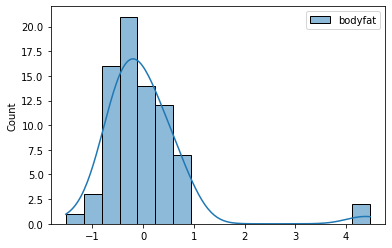

In [12]:
sns.histplot(residual,kde=True)

##New data free of outliers

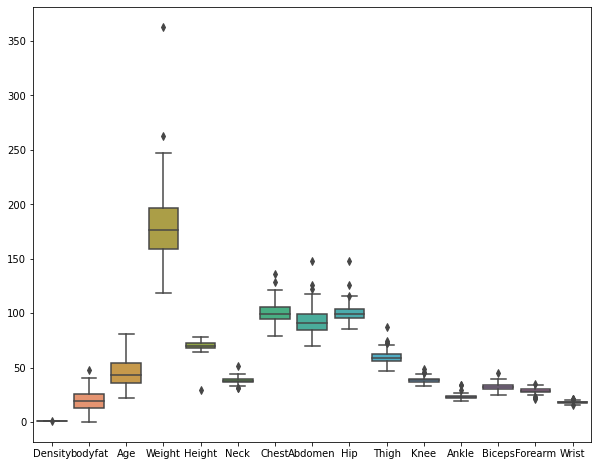

In [13]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df)

Range
    
    Q1-1.5xIQR to Q3+1.5xIQR

In [14]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

In [15]:
df=df[~((df<Q1-1.5*IQR) |(df>Q3+1.5*IQR)).any(axis=1)]

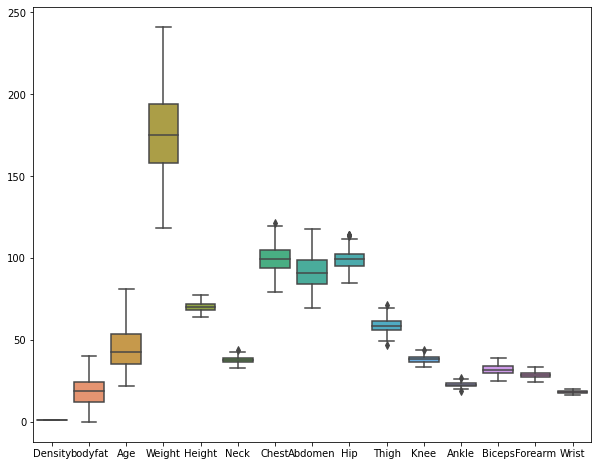

In [16]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df)

In [17]:
x=df.drop(columns=['bodyfat'])           #independent variable
y=df.loc[:,['bodyfat']]                  #dependent variable


#now using sklearn train and test the data by dividing the data again in train and test data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [18]:
# Fit model 

model=LinearRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [19]:
#y intercept
print(model.intercept_)
#slope
print(model.coef_)
# r square
print("Training accuracy : ",model.score(xtrain,ytrain))
print("Testing accuracy : ",model.score(xtest,ytest))

[433.13575382]
[[-3.96791060e+02  1.63559884e-02  2.09323241e-02 -1.30678177e-03
  -8.56081483e-04  4.58686611e-02  1.26689892e-02  3.29469083e-03
   4.51031956e-02 -3.33890351e-02 -3.22717813e-01 -1.00307792e-01
   1.83599420e-03  1.98725446e-01]]
Training accuracy :  0.9679562543315414
Testing accuracy :  0.988001095185923


Conclusion :

    Training accuracy :  0.9679562543315414
    Testing accuracy :  0.988001095185923

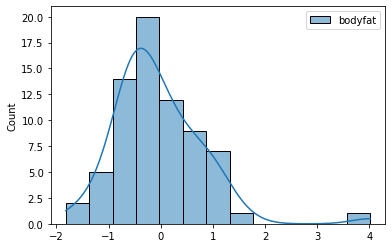

In [20]:
residual=ytest-ypred
sns.histplot(residual,kde=True)

##New data with scaled features

In [21]:
s=StandardScaler()
x=s.fit_transform(x)

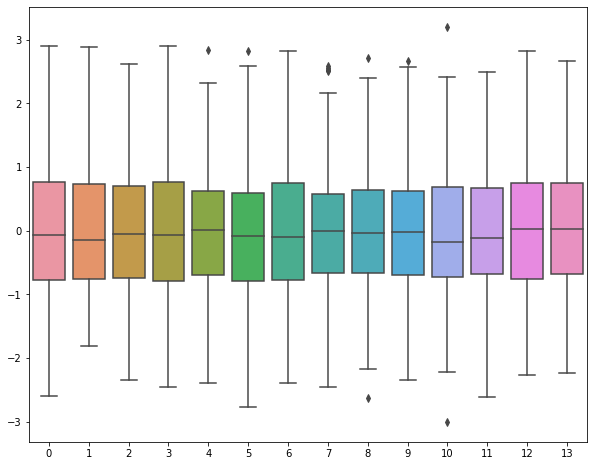

In [22]:
plt.figure(figsize=(10,8))
sns.boxplot(data=x)

In [23]:
#now using sklearn train and test the data by dividing the data again in train and test data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [24]:
# Fit model 

model=LinearRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [25]:
#y intercept
print(model.intercept_)
#slope
print(model.coef_)
# r square
print("Training accuracy : ",model.score(xtrain,ytrain))
print("Testing accuracy : ",model.score(xtest,ytest))

[18.63107867]
[[-7.14993505e+00  2.05420415e-01  5.16968115e-01 -3.35564868e-03
  -1.81378030e-03  3.47788462e-01  1.18270598e-01  1.91171997e-02
   2.02717046e-01 -7.20134260e-02 -4.10729008e-01 -2.80909457e-01
   3.28037263e-03  1.66339711e-01]]
Training accuracy :  0.9679562543315414
Testing accuracy :  0.9880010951859235


In [26]:
# mean of residuals
residuals = ytest-ypred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals bodyfat   -0.051724
dtype: float64


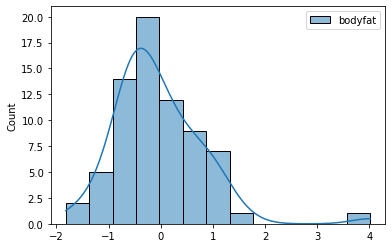

In [27]:
sns.histplot(residuals,kde=True)

Conclusion :

    Training accuracy :  0.9679562543315414
    Testing accuracy :  0.9880010951859235

    Mean of Residuals bodyfat   -0.051724 i.e. very close to zero

In [28]:
test=s.fit_transform([[1.0708 ,	23 ,	154.25 ,	67.75 ,	36.2 ,	93.1 ,	85.2 ,	94.5 ,	59.0 ,	37.3 ,	21.9 ,	32.0 ,	27.4 ,	17.1]])

In [29]:
#demo prediction on row 0 in df
# model.predict([['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest','Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm','Wrist']])
prediction=model.predict(test)
print(prediction)

[[18.63107867]]


##R-squared and Adj R-squared

    Value of r-squared never decreases no matter the number of variables we add to our regression model. 
    That is, even if we are adding redundant variables to the data, the value of R-squared does not decrease. 
    It either remains the same or increases with the addition of new independent variables. 
    This clearly does not make sense because some of the independent variables might not be useful in determining the target variable.
    Adjusted R-squared deals with this issue.

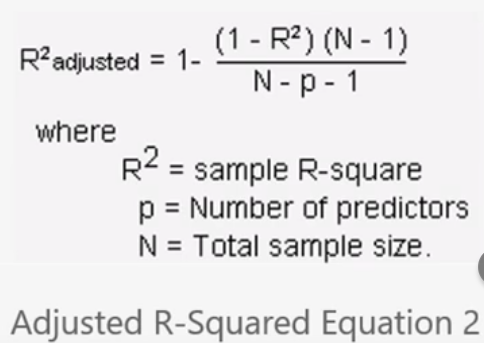

In [31]:
from statsmodels import api as sm

In [36]:
x1=sm.add_constant(x)
model=sm.OLS(y,x1).fit()    #Ordinary least square
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                bodyfat   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     600.4
Date:                Sun, 25 Jul 2021   Prob (F-statistic):          5.08e-166
Time:                        06:06:25   Log-Likelihood:                -385.44
No. Observations:                 234   AIC:                             800.9
Df Residuals:                     219   BIC:                             852.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.6154      0.085    219.265      0.000      18.448      18.783
x1            -7.3398      0.157    -46.811      0.000      -7.649      -7.031
x2             0.1467      0.130      1.127      0.261      -0.110       0.403
x3             0.5084      0.542      0.939      0.349      -0.559       1.576
x4            -0.0406      0.159     -0.255      0.799      -0.354       0.273
x5            -0.0586      0.171     -0.342      0.733      -0.396       0.279
x6             0.1568      0.260      0.603      0.547      -0.355       0.669
x7             0.1196      0.321      0.372      0.710      -0.513       0.752
x8             0.0586      0.277      0.211      0.833      -0.487       0.604
x9             0.0731      0.216      0.338      0.736      -0.353       0.500
x10            0.0133      0.185      0.072      0.943      -0.352       0.378
x11           -0.3172      0.144     -2.205      0.029      -0.601      -0.034
x12           -0.1766      0.161     -1.098      0.274      -0.494       0.140
x13           -0.0425      0.192     -0.221      0.825      -0.421       0.336
x14            0.0952      0.160      0.597      0.551      -0.219       0.410
==============================================================================
Omnibus:                      318.634   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69019.925
Skew:                           5.631   Prob(JB):                         0.00
Kurtosis:                      86.379   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Adding new columns to check whether adjusted r squared is reducing or not.

df['new column']=np.random.randint(10,15,len(df['Age']))
df['new column1']=np.random.randint(10,15,len(df['Age']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
df.head()

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,new column,new column1
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,13,10
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,12,13
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,14,14
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,14,10
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,13,10


In [50]:
x=df.drop(columns=['bodyfat'])           #independent variable
y=df.loc[:,['bodyfat']]                  #dependent variable

s=StandardScaler()
x=s.fit_transform(x)

#now using sklearn train and test the data by dividing the data again in train and test data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [51]:
# Fit model 

model=LinearRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [52]:
x2=sm.add_constant(x)
model=sm.OLS(y,x2).fit()    #Ordinary least square
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                bodyfat   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     533.9
Date:                Sun, 25 Jul 2021   Prob (F-statistic):          2.13e-164
Time:                        06:44:44   Log-Likelihood:                -382.57
No. Observations:                 234   AIC:                             799.1
Df Residuals:                     217   BIC:                             857.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.6154      0.084    220.959      0.000      18.449      18.781
x1            -7.3408      0.156    -47.178      0.000      -7.647      -7.034
x2             0.1136      0.130      0.873      0.384      -0.143       0.370
x3             0.5075      0.538      0.944      0.346      -0.552       1.567
x4            -0.0799      0.159     -0.501      0.617      -0.394       0.234
x5            -0.0536      0.170     -0.315      0.753      -0.389       0.282
x6             0.0983      0.259      0.379      0.705      -0.412       0.609
x7             0.1632      0.319      0.511      0.610      -0.466       0.792
x8             0.1048      0.277      0.379      0.705      -0.440       0.650
x9             0.0049      0.217      0.023      0.982      -0.422       0.432
x10            0.0169      0.184      0.092      0.927      -0.345       0.379
x11           -0.2943      0.143     -2.056      0.041      -0.576      -0.012
x12           -0.1548      0.160     -0.965      0.336      -0.471       0.161
x13           -0.0778      0.191     -0.407      0.684      -0.454       0.299
x14            0.1308      0.159      0.821      0.413      -0.183       0.445
x15           -0.0897      0.087     -1.036      0.301      -0.260       0.081
x16           -0.1929      0.088     -2.196      0.029      -0.366      -0.020
==============================================================================
Omnibus:                      318.722   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66104.115
Skew:                           5.656   Prob(JB):                         0.00
Kurtosis:                      84.560   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""